### Different example uses for ColorCube

In [1]:
import os, sys, copy
sys.path.append("../")
%load_ext autoreload
%autoreload 2
import cv2
import numpy as np
import pickle

In [11]:
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
from modules.Interproc import DBInterface
from modules.Interproc import GuiviewState

In [4]:
from modules.AnalysisHelpers import ( imgToColors
                                     ,channelsToColorStr
                                     ,cvtPlot
                                    )
from modules.AnalysisHelpers import colorCube
from modules.AnalysisHelpers import SubprocColorCube
from modules.AnalysisHelpers import subprocColorCube

##### Load Book Data

In [5]:
DATA_DIR = "../data/misc/books/colorcube-gallery-1/"

In [7]:
gsDb = DBInterface(os.path.join(DATA_DIR,"interproc.db"))

all_data = gsDb.selectAll()
    
listGS = [ pickle.loads(d[1]) for d in all_data]
                
[_gs.frameCounter for _gs in listGS]

[0, 0, 0, 0, 189, 256]

In [ ]:
# interproc data:
#frame0
# 0: wide zoomWindow
# 1: tight zoomWindow
# 2
# 3: score obj-enum=0 of ball
#frame189
# 4: score of ball
#frame256
# 5: score of ball

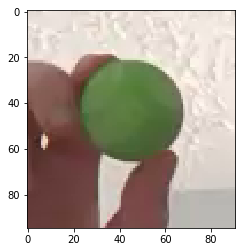

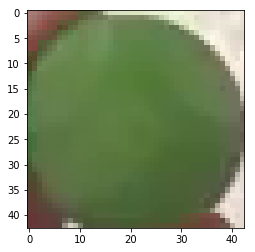

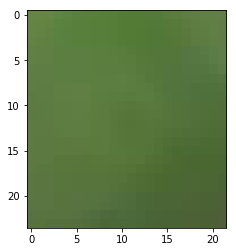

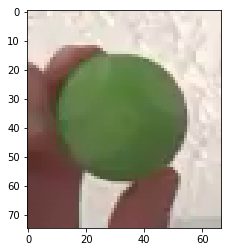

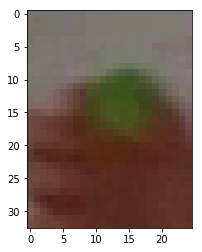

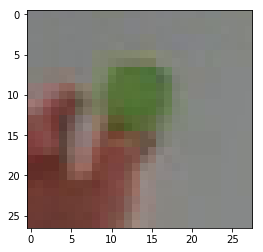

In [12]:
for _gs in listGS:
    _gs.initDisplay()
    cvtPlot(_gs.getZoomWindow())
    plt.show()

### Build thresh region volume

In [19]:
from modules.ControlTracking import TrackFactory

In [22]:
tracker = TrackFactory()
tracker.setInit(ballColor="green")

threshLo = tracker.getTrackParams()['thresh_lo']
threshHi = tracker.getTrackParams()['thresh_hi']

print threshLo, threshHi

(29, 86, 6) (64, 255, 255)


In [23]:
from itertools import *

In [38]:
def threshToCorners(threshLo, threshHi):
    ''' output 8 3-ples from input 2 3-ples'''
    
    ret = []
    threshes = [list(threshLo)]
    threshes.append(list(threshHi))
    
    for _x in range(2):
        for _y in range(2):
            for _z in range(2):
                
                    x = threshes[_x][0]
                    y = threshes[_y][1]
                    z = threshes[_z][2]
                    
                    ret.append((x,y,z))
                    
    return ret
    
regionCorners = threshToCorners(threshLo, threshHi)

regionCorners

[(29, 86, 6),
 (29, 86, 255),
 (29, 255, 6),
 (29, 255, 255),
 (64, 86, 6),
 (64, 86, 255),
 (64, 255, 6),
 (64, 255, 255)]

In [39]:
regionMarkers = [
    [ corner[clr] for corner in regionCorners]
    for clr in range(3)
]
regionMarkers
                    

[[29, 29, 29, 29, 64, 64, 64, 64],
 [86, 86, 255, 255, 86, 86, 255, 255],
 [6, 255, 6, 255, 6, 255, 6, 255]]

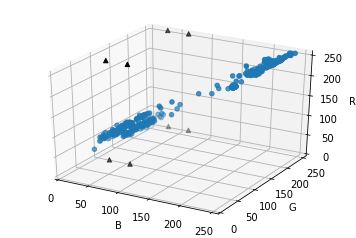

In [40]:
colorCube(listB, listG, listR, regionMarkers = regionMarkers)

In [41]:
subprocColorCube(listB, listG, listR, regionMarkers = regionMarkers)

loaded class type:  SubprocColorCube


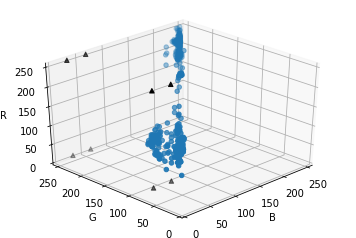

In [42]:
p = SubprocColorCube()
p.load()
p.callPlot()

In [56]:
#find 2-ples of corners where only 1-element if different; the edges
regionCornerSets = (
    filter(lambda cornerSet: 2 == sum( [ 
                                int((cornerSet[0][elem] - cornerSet[1][elem]) == 0)
                                for elem in range(3)
                                ])
        , [x for x in combinations(regionCorners, 2)]
      )
)
regionCornerSets

[((29, 86, 6), (29, 86, 255)),
 ((29, 86, 6), (29, 255, 6)),
 ((29, 86, 6), (64, 86, 6)),
 ((29, 86, 255), (29, 255, 255)),
 ((29, 86, 255), (64, 86, 255)),
 ((29, 255, 6), (29, 255, 255)),
 ((29, 255, 6), (64, 255, 6)),
 ((29, 255, 255), (64, 255, 255)),
 ((64, 86, 6), (64, 86, 255)),
 ((64, 86, 6), (64, 255, 6)),
 ((64, 86, 255), (64, 255, 255)),
 ((64, 255, 6), (64, 255, 255))]

In [65]:
regionEdges = []

step_amt = 5

for cornerSet in regionCornerSets:
    
    ind_step = [0 == (cornerSet[0][clr] - cornerSet[1][clr]) for clr in range(3)].index(False)
#     print ind_step
    
    step_lo = min(cornerSet[0][ind_step], cornerSet[1][ind_step])
    step_hi = max(cornerSet[0][ind_step], cornerSet[1][ind_step])
    
    inds_hold = [clr for clr in range(3) if clr != ind_step]
    
    for _step in range(step_lo, step_hi, step_amt):
        
        _point = [0,0,0]
        
        for _hold in inds_hold:
            _point[_hold] = cornerSet[0][_hold]
            
        _point[ind_step] = _step
        
        regionEdges.append(_point)            

regionEdges

[[29, 86, 6],
 [29, 86, 11],
 [29, 86, 16],
 [29, 86, 21],
 [29, 86, 26],
 [29, 86, 31],
 [29, 86, 36],
 [29, 86, 41],
 [29, 86, 46],
 [29, 86, 51],
 [29, 86, 56],
 [29, 86, 61],
 [29, 86, 66],
 [29, 86, 71],
 [29, 86, 76],
 [29, 86, 81],
 [29, 86, 86],
 [29, 86, 91],
 [29, 86, 96],
 [29, 86, 101],
 [29, 86, 106],
 [29, 86, 111],
 [29, 86, 116],
 [29, 86, 121],
 [29, 86, 126],
 [29, 86, 131],
 [29, 86, 136],
 [29, 86, 141],
 [29, 86, 146],
 [29, 86, 151],
 [29, 86, 156],
 [29, 86, 161],
 [29, 86, 166],
 [29, 86, 171],
 [29, 86, 176],
 [29, 86, 181],
 [29, 86, 186],
 [29, 86, 191],
 [29, 86, 196],
 [29, 86, 201],
 [29, 86, 206],
 [29, 86, 211],
 [29, 86, 216],
 [29, 86, 221],
 [29, 86, 226],
 [29, 86, 231],
 [29, 86, 236],
 [29, 86, 241],
 [29, 86, 246],
 [29, 86, 251],
 [29, 86, 6],
 [29, 91, 6],
 [29, 96, 6],
 [29, 101, 6],
 [29, 106, 6],
 [29, 111, 6],
 [29, 116, 6],
 [29, 121, 6],
 [29, 126, 6],
 [29, 131, 6],
 [29, 136, 6],
 [29, 141, 6],
 [29, 146, 6],
 [29, 151, 6],
 [29, 156, 6]

In [67]:
plotEdges = [
    [ corner[clr] for corner in regionEdges]
    for clr in range(3)
]

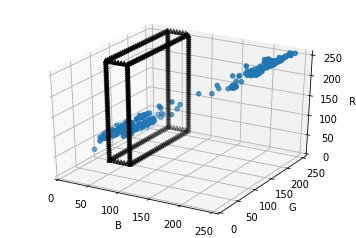

In [70]:
subprocColorCube(listB, listG, listR, regionMarkers = plotEdges)
colorCube(listB, listG, listR, regionMarkers = plotEdges)

### Multi-Scatter

In [131]:
from modules.AnalysisHelpers import ( imgToColors
                                     ,channelsToColorStr
                                     ,cvtPlot
                                    )
from modules.AnalysisHelpers import colorCube
from modules.AnalysisHelpers import SubprocColorCube
from modules.AnalysisHelpers import subprocColorCube

In [83]:
print len(img.flatten())
print img.shape
print reduce(lambda a,b: a*b, img.shape)

25935
(95, 91, 3)
25935


In [97]:
from modules.imgutils import filter_pixels_circle, crop_img
from modules.ControlDisplay import Display

In [89]:
gs3 = listGS[3]

In [90]:
img2 = gs3.getZoomWindow()

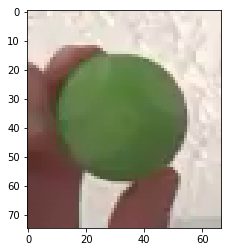

In [91]:
cvtPlot(img2)

In [92]:
gs3.zoomRect

(194.0, 146.0, 67.0, 75.0)

In [100]:
score = gs3.displayOutputScore['0']['data']

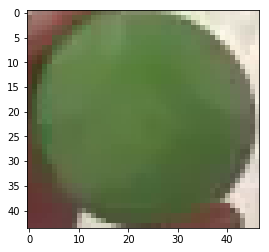

In [101]:
img2a = crop_img( gs3.getOrigFrame(), Display.absRect(score))
cvtPlot(img2a)

In [102]:
pixIn = filter_pixels_circle(img2a, b_inside = True)
pixOut = filter_pixels_circle(img2a, b_inside = False)

print len(pixIn), len(pixOut)

1386 729


In [118]:
pixelsIn = [[pix[clr] for pix in pixIn ]  for clr in range(3) ]
pixelsOut = [[pix[clr] for pix in pixOut ]  for clr in range(3) ]

In [119]:
newData = {}
newData['^'] = pixelsIn

In [126]:
print len(pixelsOut), len(pixelsOut[0])

3 729


In [134]:
imgBackground = listGS[0].getOrigFrame()
colorBackground = imgToColors(imgBackground, sampleN= 1000)

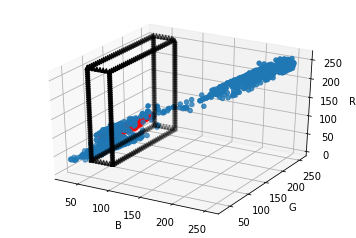

In [135]:
# img = listGS[0].getZoomWindow()

# colorData = imgToColors(img, sampleN = 1000)

# listB, listG, listR = colorData

colorCube( *colorBackground
#          ,listColors = channelsToColorStr(*pixelsOut)
          ,regionMarkers = plotEdges 
          ,spaceTotal=False
          ,dictData = newData)

subprocColorCube( *colorBackground
#          ,listColors = channelsToColorStr(*pixelsOut)
          ,regionMarkers = plotEdges 
          ,spaceTotal=False
          ,dictData = newData)

loaded class type:  SubprocColorCube


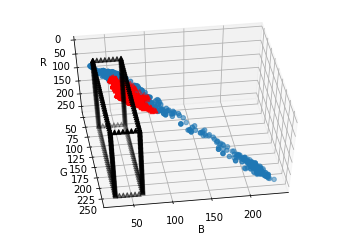

In [133]:
p = SubprocColorCube()
p.load()
p.callPlot()

loaded class type:  SubprocColorCube


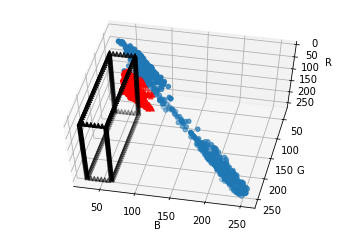

In [136]:
p = SubprocColorCube()
p.load()
p.callPlot()

### Other type of colorCube

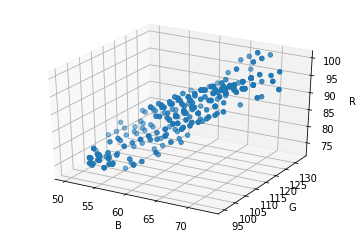

In [72]:
img = listGS[2].getZoomWindow()

colorData2 = imgToColors(img, sampleN = 1000)

# listB, listG, listR = colorData

colorCube(*colorData2, spaceTotal=False)
subprocColorCube(*colorData2, spaceTotal=False)